In [1]:
import os
import sys
import warnings
import math

warnings.filterwarnings('ignore')
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('src'), '..')))

from src.constants import *
from src.visualize import *
from src.data import preprocess, torus, on_and_on, get_data

## Representative Persistence Diagrams

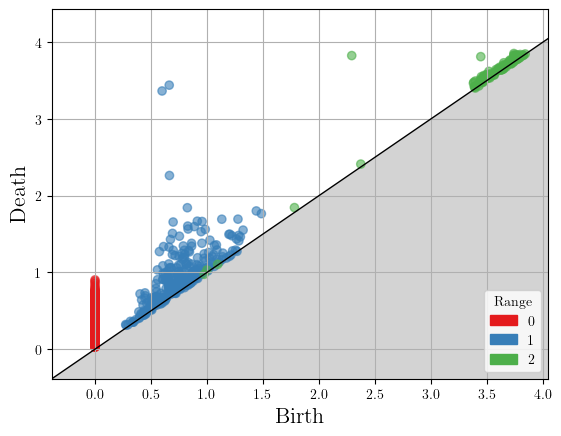

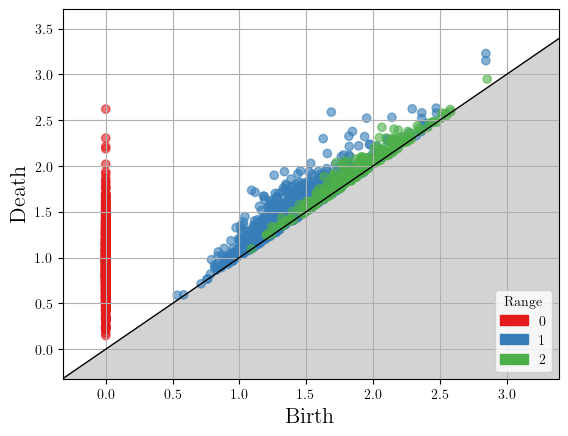

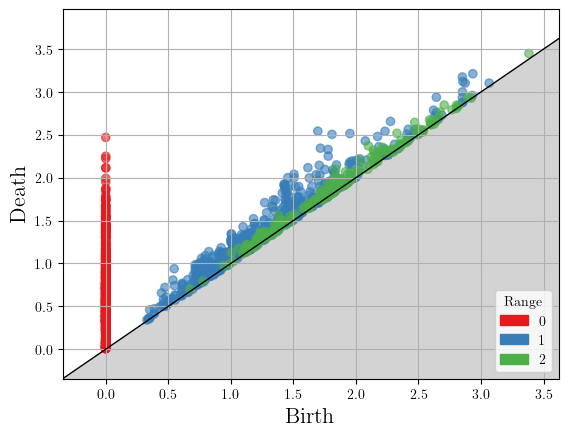

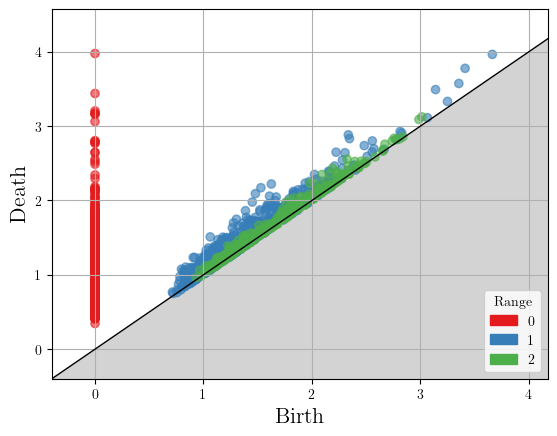

In [2]:
datasets = [
    preprocess(torus(), TORUS), preprocess(on_and_on(), ON_AND_ON),
    preprocess(get_data(CONCRETE_DATA_DATASET_ID), CONCRETE_DATA),
    preprocess(get_data(DIABETES_DATASET_ID), DIABETES)
]

for dataset in datasets:
    plot_persistence_diagram(TDA[VR][FUNCTION](dataset[DATA]))

## Missing Rate - Torus

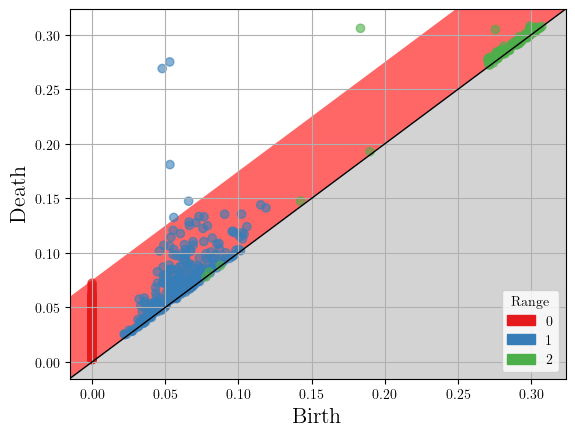

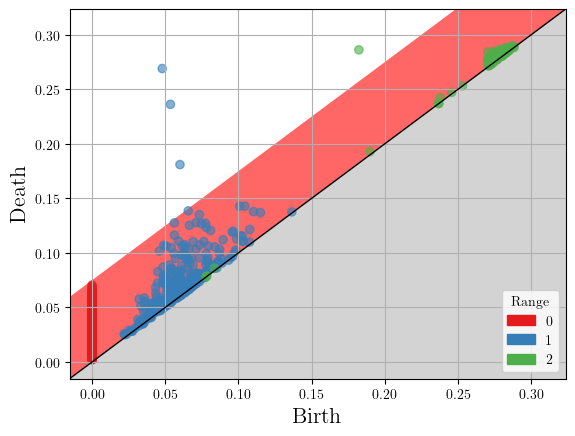

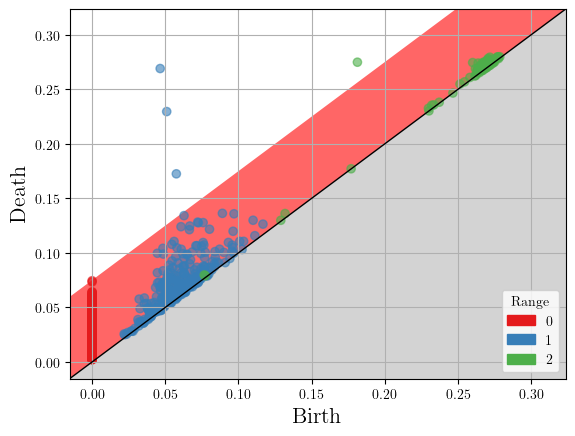

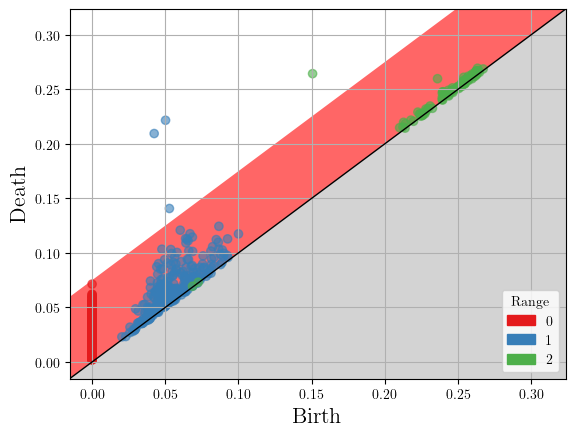

In [3]:
persistence_diagram_missing_rate(preprocess(torus(), TORUS))

## Missing Rate - On & On

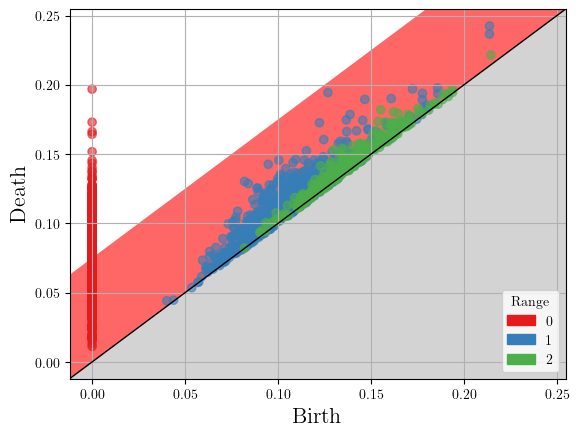

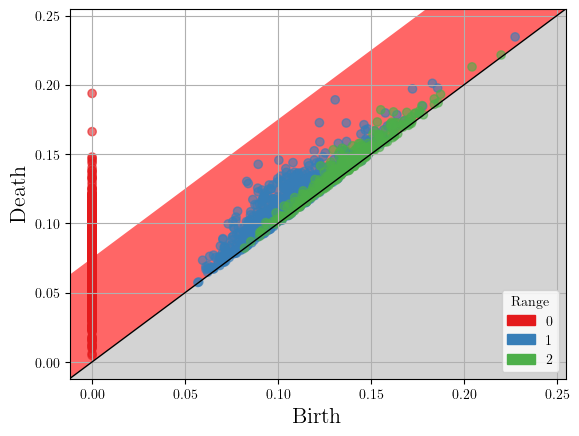

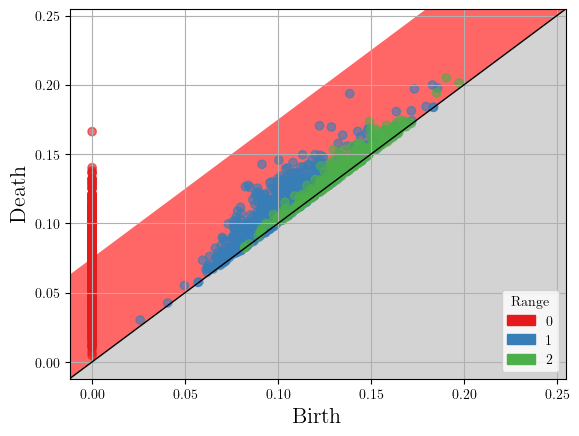

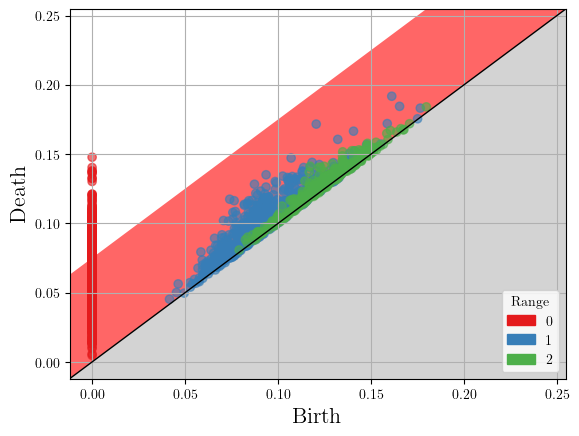

In [4]:
persistence_diagram_missing_rate(preprocess(on_and_on(), ON_AND_ON))

## Missing Rate - Concrete Data

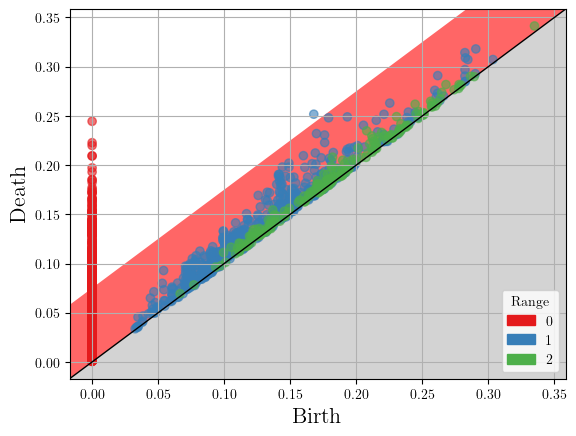

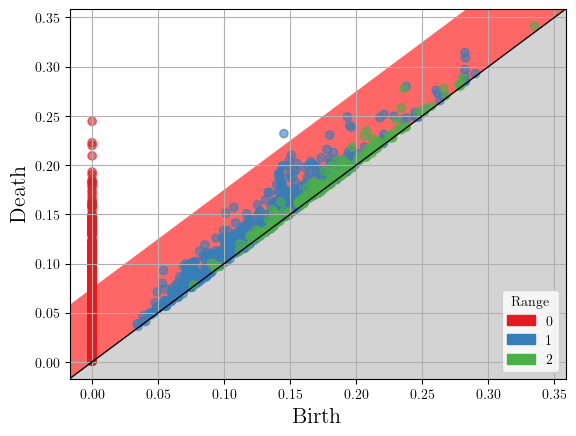

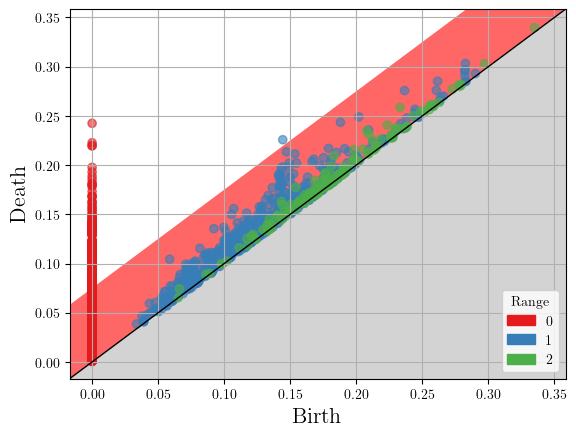

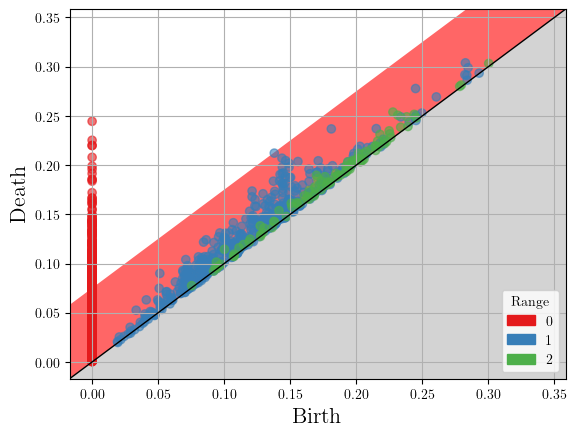

In [5]:
persistence_diagram_missing_rate(preprocess(get_data(CONCRETE_DATA_DATASET_ID), CONCRETE_DATA))

## Missing Rate - Diabetes

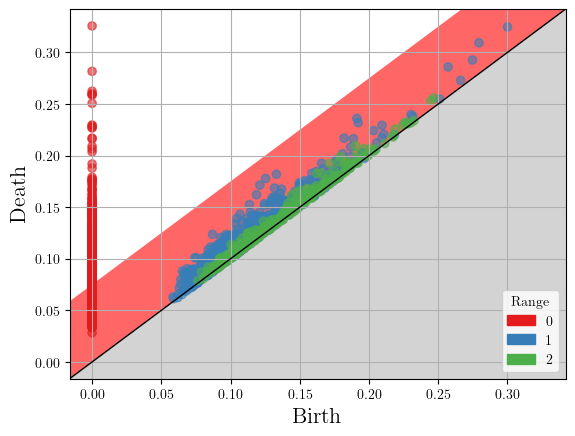

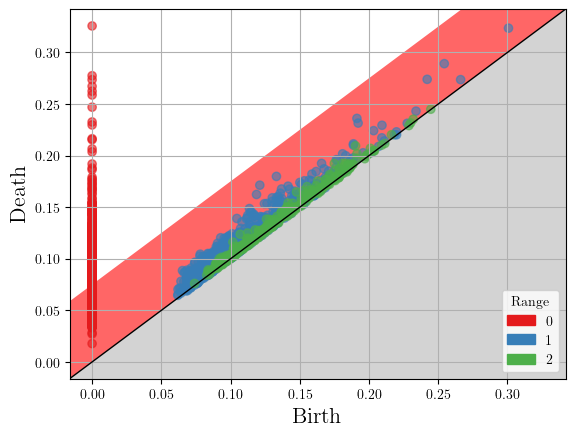

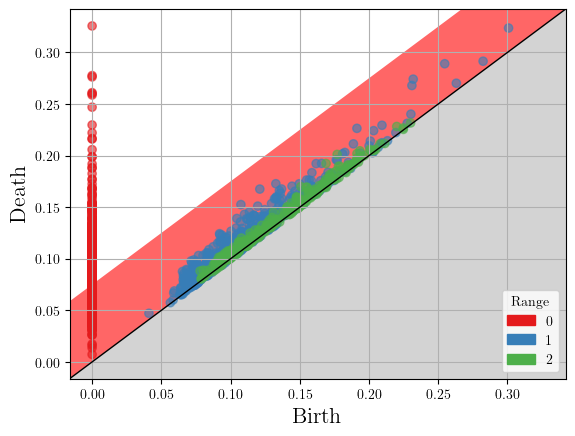

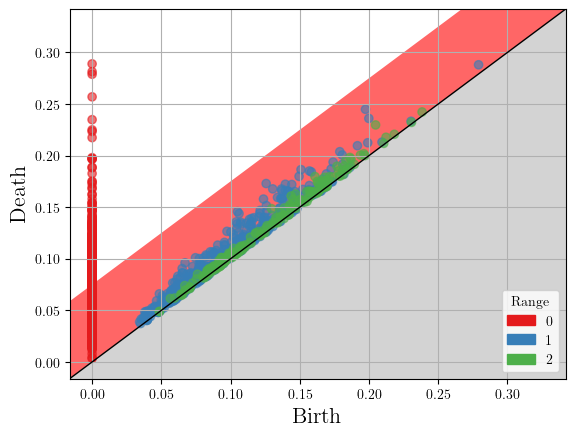

In [6]:
persistence_diagram_missing_rate(preprocess(get_data(DIABETES_DATASET_ID), DIABETES))

## Growth of k

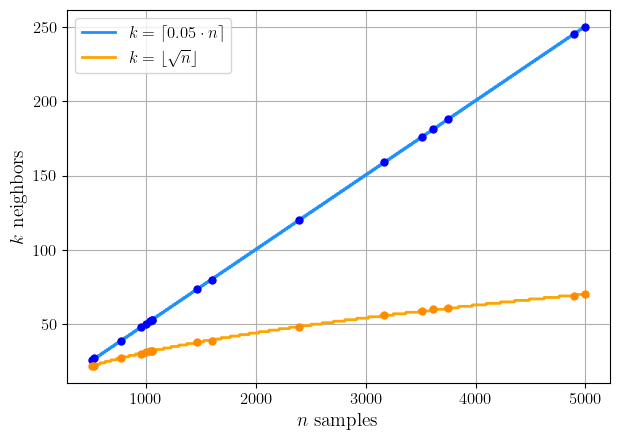

In [8]:
n_values = np.arange(MIN_SAMPLES, MAX_SAMPLES)
k_chazal = [math.ceil(0.05 * n) for n in n_values]
k_non_chazal = [int(np.sqrt(n)) for n in n_values]

highlight_n = [508, 522, 768, 950, 1000, 1030, 1049, 1052, 1461, 1599, 2394, 3168, 3509, 3611, 3749, 4898, 5000]
k_chazal_highlight = [math.ceil(0.05 * n) for n in highlight_n]
k_non_chazal_highlight = [int(np.sqrt(n)) for n in highlight_n]

fig, ax = setup_figure(rows=1, cols=1)
ax.plot(n_values, k_chazal, color='dodgerblue', linewidth=2, label=r'$k = \lceil 0.05 \cdot n \rceil$')
ax.plot(n_values, k_non_chazal, color='orange', linewidth=2, label=r'$k = \lfloor \sqrt{n} \rfloor$')
ax.scatter(highlight_n, k_chazal_highlight, color='blue', s=25, zorder=5)
ax.scatter(highlight_n, k_non_chazal_highlight, color='darkorange', s=25, zorder=5)
ax.set_xlabel(r'$n\ \mathrm{samples}$', fontsize=14)
ax.set_ylabel(r'$k\ \mathrm{neighbors}$', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()